## Комментарий наставника
Привет, Игорь! Меня зовут Александр и я буду проверять твой проект. Спасибо за твою работу:) Далее по ходу работы я оставлю свои комментарии и предложения. Постарайся их учесть в этом и дальнейших проектах. Комментарии ты можешь найти в текстовой ячейке с заголовком «Комментарий наставника» (как здесь) либо в ячейках с кодом в следующем виде: «#Комментарий наставника: <сам комментарий>». \
Часть комментариев может быть выделена цветом: \
<span style="color:green">Зелёный цвет символизирует, что всё отлично.</span> \
<span style="color:orange">Оранжевый цвет символизирует рекомендации.</span> \
<span style="color:red">Красный цвет символизирует недочёты.</span> \
<span style="color:blue">Синим цветом отмечен итоговый комментарий.</span>

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Комментарий наставника
<span style="color:green">Приступим к работе.</span>

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
print(df_0.head())
print(df_1.head())
print(df_2.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [4]:
print(df_0.info())
print(df_1.info())
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory 

Text(0, 0.5, 'Product')

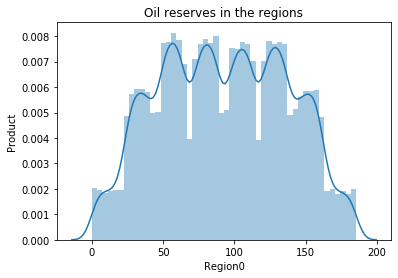

In [5]:
import matplotlib.pyplot as plt
sns.distplot(df_0['product'])
plt.title("Oil reserves in the regions")
plt.xlabel("Region0")
plt.ylabel("Product")

Text(0, 0.5, 'Product')

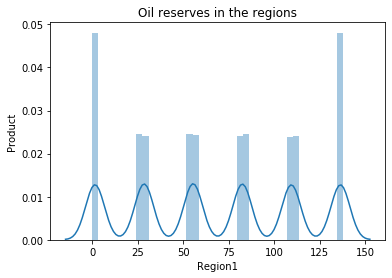

In [6]:
import matplotlib.pyplot as plt
sns.distplot(df_1['product'])
plt.title("Oil reserves in the regions")
plt.xlabel("Region1")
plt.ylabel("Product")

Text(0, 0.5, 'Product')

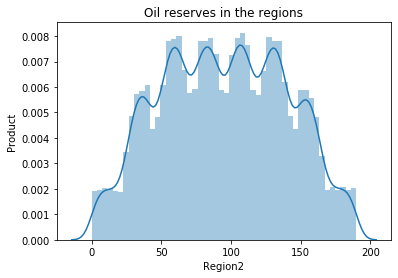

In [7]:
import matplotlib.pyplot as plt
sns.distplot(df_2['product'])
plt.title("Oil reserves in the regions")
plt.xlabel("Region2")
plt.ylabel("Product")

## Комментарий наставника
<span style="color:green">Визуализация — это всегда хорошо!</span> \
<span style="color:orange">Кстати, для ознакомления с датасетами тоже можно было добавить функцию и проитерироваться по регионам.</span>

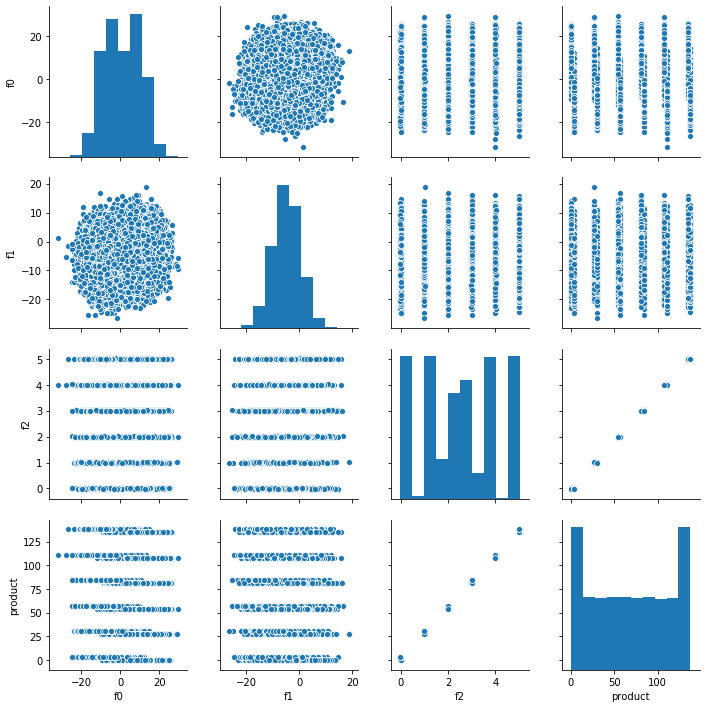

In [8]:
sns.pairplot(df_1)

**Вывод:**

Загрузили исходные данные и изучили их. Каких-либо проблем не обнаружены в них, предобработка не требуется и мы можем приступить к дальнейшим действиям.
Наблюдаем,что для региона с №1, распределнение запасов в регионах №0 и №2 существенно отличается. Видны ярко выраженные пики, где сконцетрированы месторождения.
Дополнительно изучили на зависимости признаков друг от друга для выделяющегося региона.
Отмечена зависимость f2 от product, соотвественно от этого скорее всего и возникает хорошее качество линейной модели.


## Комментарий наставника
<span style="color:green">Абсолютно верно! К первой части работы вопросов нет, идём далее.</span>

# 2. Обучение и проверка модели

Согласно условиям задачи, обучение модели будет при помощи линейной регрессии.
Напишем функцию при помощи которой разобъем данные на обучающую (75:25), обучим модель и сделаем предсказания на валидационной выборке.

In [9]:
model = LinearRegression()

In [10]:
def model_function (data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=666)
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_valid)), target_valid

## Комментарий наставника
<span style="color:green">Молодец! Замечательно, что используешь функции. Это здорово сокращает дубликацию кода и позволяет сделать проект компактнее.</span>

In [11]:
predicted_0, target_0 = model_function(df_0)

In [12]:
predicted_1, target_1 = model_function(df_1)

In [13]:
predicted_2, target_2 = model_function(df_2)

Изучим средние запасы сырья для каждого из регионов и RMSE моделей.

In [14]:
def oil_and_rmse (answers, predictions):
    mse = mean_squared_error(answers, predictions)
    print('Средний запас сырья, тыс. баррелей:', predictions.mean())
    print('RMSE:', mse ** 0.5)

## Комментарий наставника
<span style="color:orange">К слову, подсчёт RMSE и вывод среднего запаса сырья тоже можно было включить в функцию `model_function`.</span>

In [15]:
print('Регион №0')
print()
oil_and_rmse(target_0, predicted_0)

Регион №0

Средний запас сырья, тыс. баррелей: 92.59883747361133
RMSE: 37.78852914975086


In [16]:
print('Регион №1')
print()
oil_and_rmse(target_1, predicted_1)

Регион №1

Средний запас сырья, тыс. баррелей: 69.119604542144
RMSE: 0.8899276270922475


In [17]:
print('Регион №2')
print()
oil_and_rmse(target_2, predicted_2)

Регион №2

Средний запас сырья, тыс. баррелей: 95.05831290258574
RMSE: 40.008583723061925


**Вывод:**

Лучший результат модели наблюдается у региона №1, причиной тому может быть корреляция одного из признаков с целевым.
Для региона 0 и 2 наблюдаем большие средние запасы продукта,а также большие значения для RMSE.


## Комментарий наставника
<span style="color:green">Со всем согласен. Переходим к третьей части работы.</span>

# 3. Подготовка к расчёту прибыли

Добавим константы из условий задачи и посчитаем минимальное среднее значение продукта необходимое для разработки.

In [18]:
budget = 10e9
explore_points=500
best_points=200
one_well_budget=50e6
profit=450000
risks=0.025

## Комментарий наставника
<span style="color:orange">Константы принято указывать заглавными буквами: `BUDGET`.</span>

In [19]:
one_well_budget/profit

111.11111111111111

In [20]:
def revenue(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:best_points]
    return ((profit * selected.sum()) - budget) / 10e8

## Комментарий наставника
<span style="color:green">Функция правильная.</span>

In [21]:
revenue(target_0, predicted_0)

3.3651062961070406

In [22]:
revenue(target_1, predicted_1)

2.4150866966815108

In [23]:
revenue(target_2, predicted_2)

2.0007895216939278

**Вывод:**

Посчитали объем сырья для одной скважины. По результату можно сказать, что минимальный необходимый объем превышает средние значения, посчитанные ранее и добыча сырья будет убытычна в каждом из регионов. Но исходя из того, что исследуются 500, а из них отбираются 200 лучших, то попытаемся придти к прибыльным результатам.

## Комментарий наставника
<span style="color:green">Именно так! Не к чему даже придраться:)</span>

# 4. Расчёт прибыли и рисков 

Посчитаем риски и прибыль для всех трех регионов с помощью процедуры Bootstrap.

In [24]:
state = np.random.RandomState(2020)

In [25]:
def bootstrap (target, predictions):
    values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        rev = revenue(target_subsample, probs_subsample)
        values.append(rev)

    values = pd.Series(values)
    lower = values.quantile(risks)
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    mean = values.mean()

    print("Средняя выручка:", mean)
    print("2.5%-квантиль:", lower)
    print("95% доверительный интервал:", confidence_interval)
    print("Риски убытка:", (values < 0).mean())

In [26]:
print('Резултаты Региона №0')
bootstrap(target_0, predicted_0)

Резултаты Региона №0
Средняя выручка: 0.4354142254346068
2.5%-квантиль: -0.04979824110503449
95% доверительный интервал: (0.41956416177649947, 0.4512642890927141)
Риски убытка: 0.039


In [27]:
print('Резултаты Региона №1')
bootstrap(target_1, predicted_1)

Резултаты Региона №1
Средняя выручка: 0.48962884829868153
2.5%-квантиль: 0.09459752136539264
95% доверительный интервал: (0.47691995879098065, 0.5023377378063825)
Риски убытка: 0.005


In [28]:
print('Резултаты Региона №2')
bootstrap(target_2, predicted_2)

Резултаты Региона №2
Средняя выручка: 0.3576354098384011
2.5%-квантиль: -0.18907156165937744
95% доверительный интервал: (0.341127030497004, 0.3741437891797982)
Риски убытка: 0.086


## Комментарий наставника
<span style="color:green">К Bootstrap тоже нечего добавить: проведён верно, все нужные нам данные посчитаны и выведены, всё компактно.</span>

**Вывод:**

По результату проделанной работы можно сделать вывод, что Регион №1 выигрывает на фоне других, тк мы выявили здесь наименьшие риски и он несет бо́льшую прибыль, поэтому для разработки выбираем имеено Регион №1.

## Итоговый комментарий наставника
<span style="color:blue">С выбором согласен, всё подтверждается нашим исследованием. \
Игорь, проект замечательный! Молодец:) Особенно понравилась компактность проекта, поэтому за использование функций большой +. Проект зачтён без вопросов. Поздравляю тебя и желаю дальнейших успехов с машинным обучением!</span>

# Чек-лист готовности проекта

**Чек лист готового проекта**

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован